In [ ]:
import pandas as pd
import requests
r = requests.get("https://data.nasa.gov/resource/y77d-th95.json")
data = r.json()

In [ ]:
type(data),type(data[0]),data[0]

(list,
 dict,
 {'name': 'Aachen',
  'id': '1',
  'nametype': 'Valid',
  'recclass': 'L5',
  'mass': '21',
  'fall': 'Fell',
  'year': '1880-01-01T00:00:00.000',
  'reclat': '50.775000',
  'reclong': '6.083330',
  'geolocation': {'type': 'Point', 'coordinates': [6.08333, 50.775]}})

In [ ]:
df = pd.DataFrame.from_records(data)
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4
0,Aachen,1,Valid,L5,21,Fell,1880-01-01T00:00:00.000,50.775000,6.083330,"{'type': 'Point', 'coordinates': [6.08333, 50....",NaN,NaN
1,Aarhus,2,Valid,H6,720,Fell,1951-01-01T00:00:00.000,56.183330,10.233330,"{'type': 'Point', 'coordinates': [10.23333, 56...",NaN,NaN
2,Abee,6,Valid,EH4,107000,Fell,1952-01-01T00:00:00.000,54.216670,-113.000000,"{'type': 'Point', 'coordinates': [-113, 54.216...",NaN,NaN
3,Acapulco,10,Valid,Acapulcoite,1914,Fell,1976-01-01T00:00:00.000,16.883330,-99.900000,"{'type': 'Point', 'coordinates': [-99.9, 16.88...",NaN,NaN
4,Achiras,370,Valid,L6,780,Fell,1902-01-01T00:00:00.000,-33.166670,-64.950000,"{'type': 'Point', 'coordinates': [-64.95, -33....",NaN,NaN


In [ ]:
df.shape[0],df.isnull().sum()

(1000,
 name                             0
 id                               0
 nametype                         0
 recclass                         0
 mass                            28
 fall                             0
 year                             1
 reclat                          12
 reclong                         12
 geolocation                     12
 :@computed_region_cbhk_fwbd    867
 :@computed_region_nnqa_25f4    866
 dtype: int64)

In [ ]:
df.drop(columns=[":@computed_region_cbhk_fwbd",":@computed_region_nnqa_25f4"],axis=1,inplace=True)
df.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass', 'fall', 'year', 'reclat',
       'reclong', 'geolocation'],
      dtype='object')

In [ ]:
df.dtypes

name           object
id             object
nametype       object
recclass       object
mass           object
fall           object
year           object
reclat         object
reclong        object
geolocation    object
dtype: object

In [ ]:
df['name'] = df['name'].astype('str')
df['nametype'] = df['nametype'].astype('str')
df['recclass'] = df['recclass'].astype('str')

In [ ]:
df['id'] = df['id'].astype('str').astype(int)
df['mass'] = df['mass'].astype('str').astype(float)
df['reclat'] = df['reclat'].astype('str').astype(float)
df['reclong'] = df['reclong'].astype('str').astype(float)

In [ ]:
df['year'] = pd.to_datetime(df['year'].astype(str),errors = 'coerce')

In [ ]:
df['geolocation'][0],type(df['geolocation'][0])

({'type': 'Point', 'coordinates': [6.08333, 50.775]}, dict)

In [ ]:
df.geolocation.values[df.geolocation.isnull()] = {}

In [ ]:
df['geolocation'].isnull().sum()

0

In [ ]:
df['geolocation'] = [d.get('coordinates') for d in df.geolocation]

In [ ]:
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01,50.77500,6.08333,"[6.08333, 50.775]"
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01,56.18333,10.23333,"[10.23333, 56.18333]"
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01,54.21667,-113.00000,"[-113, 54.21667]"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01,16.88333,-99.90000,"[-99.9, 16.88333]"
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01,-33.16667,-64.95000,"[-64.95, -33.16667]"


In [ ]:
df.dtypes

name                   object
id                      int64
nametype               object
recclass               object
mass                  float64
fall                   object
year           datetime64[ns]
reclat                float64
reclong               float64
geolocation            object
dtype: object

In [ ]:
before_2000 = df[df['year'].dt.year<2000].shape[0]
after_2000 = df[df['year'].dt.year>=2000].shape[0]
before_2000,after_2000

(912, 70)

<BarContainer object of 2 artists>

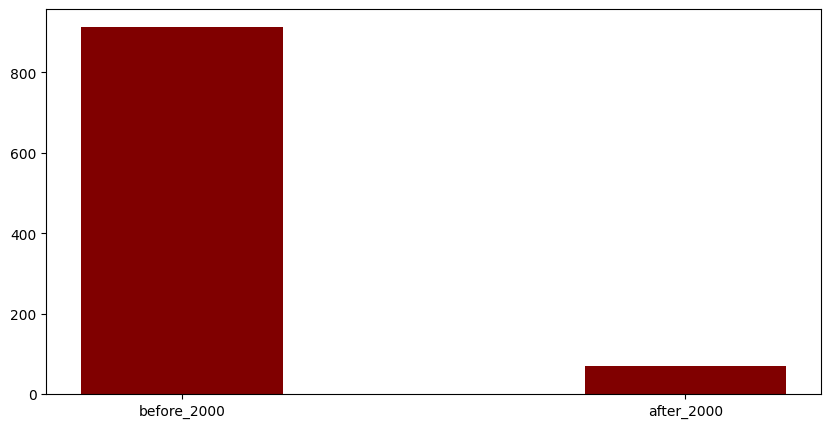

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(["before_2000","after_2000"], [before_2000,after_2000], color ='maroon',
        width = 0.4) 

In [ ]:
before_1970_mask = df['year'].dt.year<1970
after_1970_mask = df['year'].dt.year>=1970

In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 77.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 98.2 MB/s eta 0:00:00


In [ ]:
df.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass', 'fall', 'year', 'reclat',
       'reclong', 'geolocation'],
      dtype='object')

<ipython-input-88-09a7c5039e12>:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


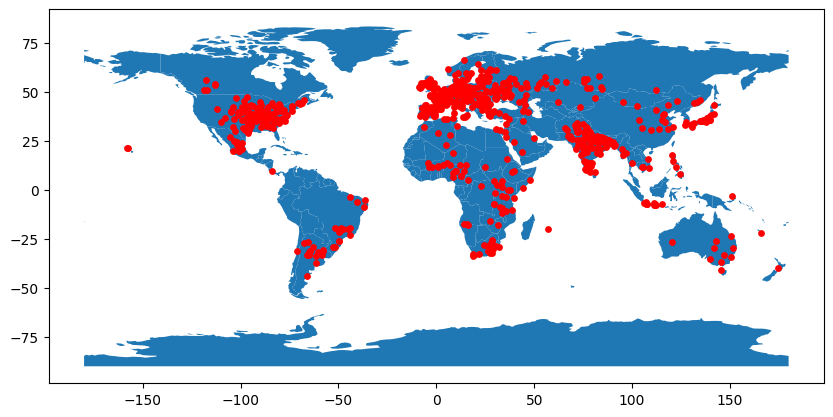

In [ ]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(df[before_1970_mask]['reclong'], df[before_1970_mask]['reclat'])]
gdf = GeoDataFrame(df[before_1970_mask], geometry=geometry)   


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

<ipython-input-89-5cd47477990a>:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


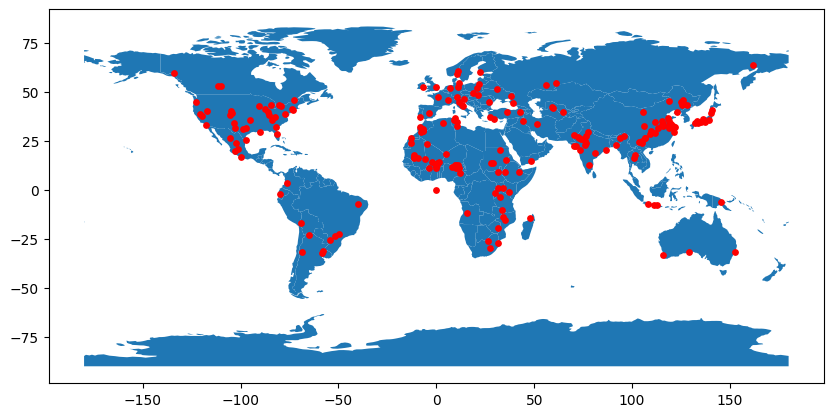

In [ ]:
#after 1970 
geometry = [Point(xy) for xy in zip(df[after_1970_mask]['reclong'], df[after_1970_mask]['reclat'])]
gdf = GeoDataFrame(df[after_1970_mask], geometry=geometry)   


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [ ]:
morethan_10k = df[df['mass']>10000.0].shape[0]
lessthan_10k = df[df['mass']<10000.0].shape[0]

<BarContainer object of 2 artists>

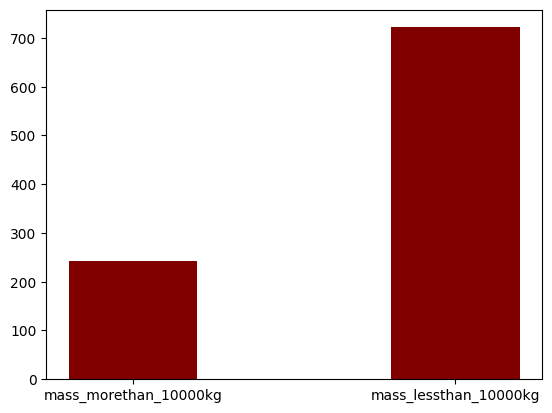

In [ ]:
plt.bar(["mass_morethan_10000kg","mass_lessthan_10000kg"], [morethan_10k,lessthan_10k], color ='maroon',
        width = 0.4) 